In [1]:
# import the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns or rows

pd.set_option('display.max_columns',None)

# pd.set_option('display.max_rows',None)


df=pd.read_csv(r'./Global_Superstore2.csv', encoding='latin-1')

In [2]:
print(df)

       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [ ]:
# Create 'gender' new variable from 'Customer Name' 

In [3]:
def add_gender_column(df):
    # Read male and female names from CSV files into DataFrames
    male_names_df = pd.read_csv('male.csv')
    female_names_df = pd.read_csv('female.csv')
    
    # Convert DataFrames to sets for faster lookup
    male_names_set = set(male_names_df['Column1'])
    female_names_set = set(female_names_df['Column1'])
    
    # Function to determine gender based on first name
    def get_gender(full_name):
        # Extract the first name from the full name
        first_name = full_name.split()[0]

        # Check if the first name is in the male or female names set
        if first_name in male_names_set:
            return 'M'
        elif first_name in female_names_set:
            return 'F'
        else:
            return 'Unknown'
        
            # Apply the function to 'Customer Name' column to create 'gender' column
    df['gender'] = df['Customer Name'].apply(get_gender)
    
    return df

In [4]:
new_df = add_gender_column(df)

In [5]:
print(new_df)

       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [7]:
#Display information about the DataFrame 

new_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [8]:
#Display missing values (sum of each variable)

new_df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
gender                0
dtype: int64

In [9]:
new_df['Postal Code'].fillna(-1, inplace=True)
new_df['Postal Code']

0        10024.0
1           -1.0
2           -1.0
3           -1.0
4           -1.0
          ...   
51285       -1.0
51286    77095.0
51287    93030.0
51288       -1.0
51289       -1.0
Name: Postal Code, Length: 51290, dtype: float64

In [10]:
new_df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         632
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
gender                3
dtype: int64

In [11]:
#display the categories from categorical variables

new_df['Sub-Category'].value_counts() 

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [12]:
new_df['Category'].value_counts() 

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [13]:
#Display basic descriptive statistics

new_df.describe() 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,10753.194697,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,26042.343659,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,-1.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,-1.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,-1.000000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,-1.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [14]:
new_df['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

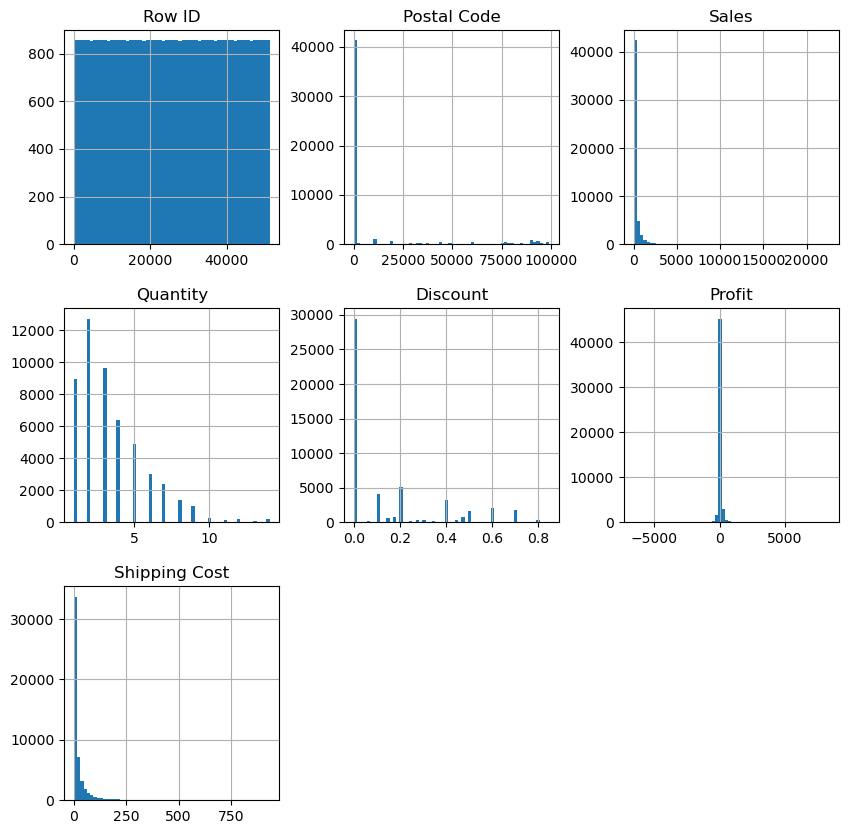

In [16]:
#Histogram for numerical columns

new_df.hist(bins=60, figsize=(10, 10)) 
plt.show()

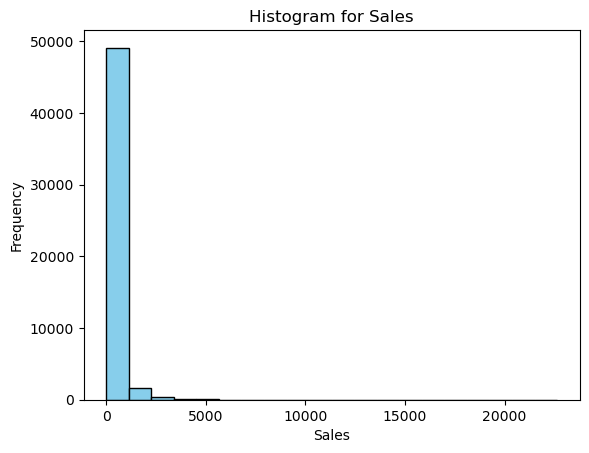

In [17]:
#Histogram for Sales

plt.hist(new_df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram for Sales')

plt.show()

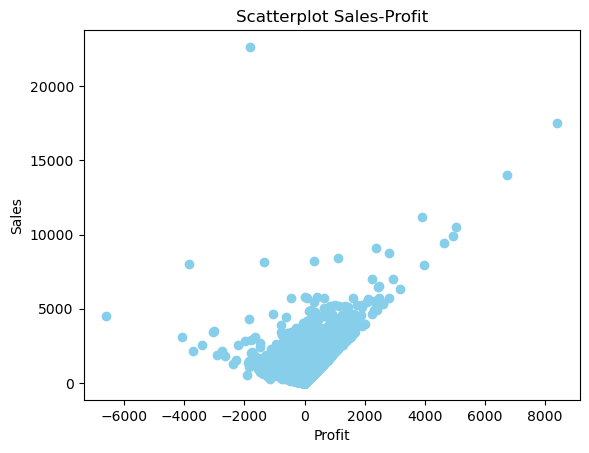

In [18]:
#Scatterplot

plt.scatter(new_df['Profit'], new_df['Sales'], color='skyblue', marker='o')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Scatterplot Sales-Profit')
plt.show()

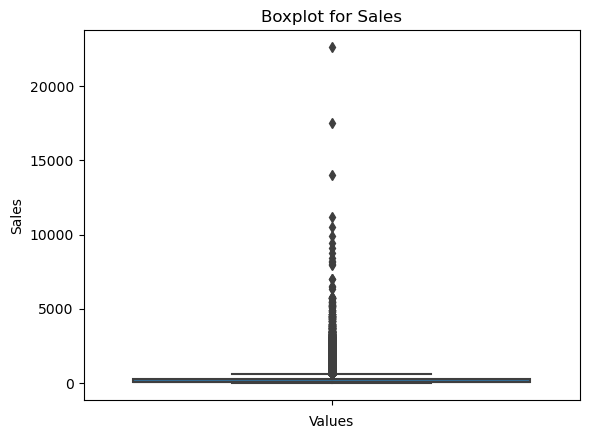

In [19]:
#Boxplot for Sales

sns.boxplot(y=new_df['Sales'])

plt.xlabel('Values')
plt.ylabel('Sales')
plt.title('Boxplot for Sales')
plt.show()

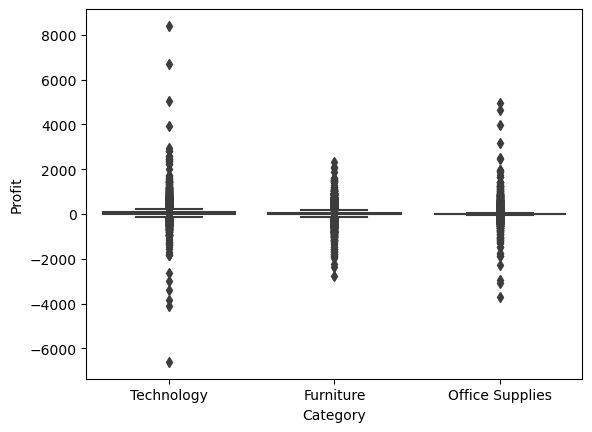

In [22]:
#Boxplot Category- Profit

sns.boxplot(x='Category', y='Profit', data=new_df)
plt.show()

In [23]:
# cross-tabulation (crosstab) to explore relationships between multiple categorical variables.

cross_tab = pd.crosstab(new_df['Category'], new_df['Country'])
print(cross_tab)

Country          Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  \
Category                                                                     
Furniture                 13        3       26      20         91        2   
Office Supplies           30        9      136      81        220        1   
Technology                12        4       34      21         79        0   

Country          Australia  Austria  Azerbaijan  Bahrain  Bangladesh  \
Category                                                               
Furniture              596       52           5        0          40   
Office Supplies       1608      218          18        1          89   
Technology             633       61           6        1          34   

Country          Barbados  Belarus  Belgium  Benin  Bolivia  \
Category                                                      
Furniture               6        9       23      1       13   
Office Supplies        13       59      104     27       27

In [ ]:
# Calculate the frequency for categorical variables

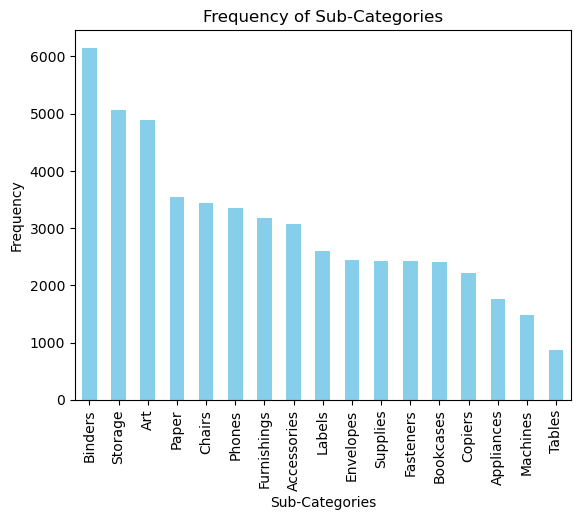

In [24]:
# Frequency of Sub-Category

frequency_counts = new_df['Sub-Category'].value_counts()

# Create a bar plot

frequency_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Sub-Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Sub-Categories')
plt.show()

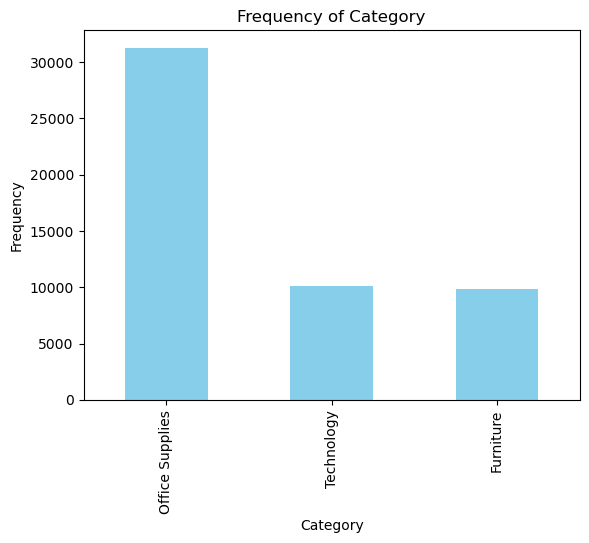

In [27]:
# Frequency of Category

frequency_counts = new_df['Category'].value_counts()

# Create a bar plot

frequency_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Category')
plt.show()

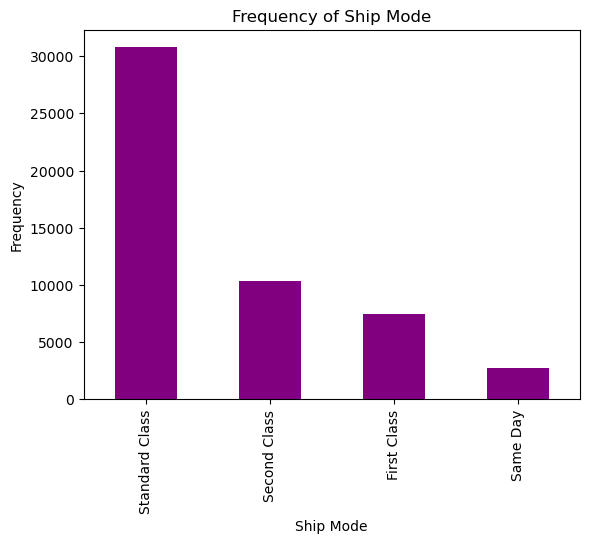

In [25]:
#Frequency of Ship Mode

frequency_counts = new_df['Ship Mode'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='purple')

plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.title('Frequency of Ship Mode')
plt.show()

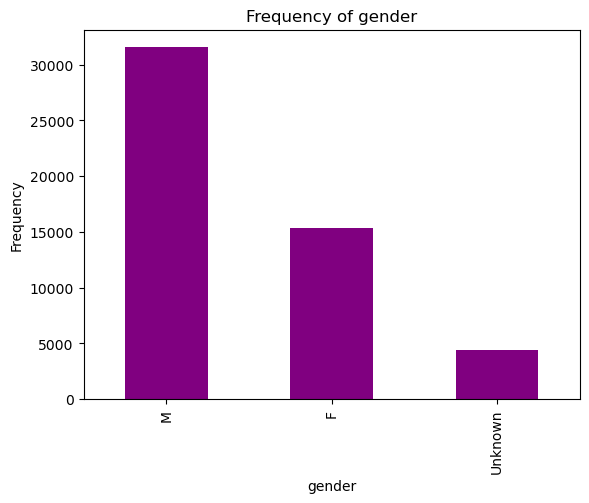

In [26]:
#Frequency of gender

frequency_counts = new_df['gender'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='purple')

plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Frequency of gender')
plt.show()

In [28]:
#OUTLIERS

#function to find outliers

def find_outliers_IQR(new_df):

   q1=new_df.quantile(0.25)

   q3=new_df.quantile(0.75)

   IQR=q3-q1

   outliers = new_df[((new_df<(q1-1.5*IQR)) | (new_df>(q3+1.5*IQR)))]

   return outliers

In [29]:
outliers = find_outliers_IQR(new_df['Sales'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 5655
max outlier value: 22638.48
min outlier value: 581.55


0        2309.650
1        3709.395
2        5175.171
3        2892.510
4        2832.960
           ...   
44220    1585.710
45234     618.084
45351     936.270
47131     607.360
50402     772.470
Name: Sales, Length: 5655, dtype: float64

In [30]:
outliers = find_outliers_IQR(new_df['Profit'])

In [31]:
outliers = find_outliers_IQR(new_df['Quantity'])

In [32]:
outliers = find_outliers_IQR(new_df['Discount'])

In [33]:
outliers = find_outliers_IQR(new_df['Shipping Cost'])

In [34]:
outliers = find_outliers_IQR(new_df['Postal Code'])

In [35]:
#Replace outliers using imputation (mean value)

def impute_outliers_IQR(new_df):

   q1=new_df.quantile(0.25)

   q3=new_df.quantile(0.75)

   IQR=q3-q1

   upper = new_df[~(new_df>(q3+1.5*IQR))].max()

   lower = new_df[~(new_df<(q1-1.5*IQR))].min()

   new_df = np.where(new_df > upper,

       new_df.mean(),

       np.where(

           new_df < lower,

           new_df.mean(),

           new_df

           )

       )

   return new_df

In [36]:
new_df['Sales'] = impute_outliers_IQR(new_df['Sales'])
new_df.describe()['Sales']

count    51290.000000
mean       135.423121
std        130.085010
min          0.444000
25%         30.758625
50%         85.053000
75%        246.490581
max        581.400000
Name: Sales, dtype: float64

In [37]:
new_df['Profit'] = impute_outliers_IQR(new_df['Profit'])
new_df.describe()['Profit']

count    51290.000000
mean        16.153749
std         23.919615
min        -55.125000
25%          2.250000
50%         13.530000
75%         28.610982
max         91.995400
Name: Profit, dtype: float64

In [38]:
new_df['Quantity'] = impute_outliers_IQR(new_df['Quantity'])
new_df.describe()['Quantity']

count    51290.000000
mean         3.335737
std          1.993515
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Quantity, dtype: float64

In [39]:
new_df['Discount'] = impute_outliers_IQR(new_df['Discount'])
new_df.describe()['Discount']

count    51290.000000
mean         0.101002
std          0.146265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.170000
max          0.500000
Name: Discount, dtype: float64

In [40]:
new_df['Shipping Cost'] = impute_outliers_IQR(new_df['Shipping Cost'])
new_df.describe()['Shipping Cost']

count    51290.000000
mean        13.159525
std         13.010905
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max         57.200000
Name: Shipping Cost, dtype: float64

In [41]:
new_df['Postal Code'] = impute_outliers_IQR(new_df['Postal Code'])
new_df.describe()['Postal Code']

count    51290.000000
mean      2094.484925
std       4259.641952
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max      10753.194697
Name: Postal Code, dtype: float64

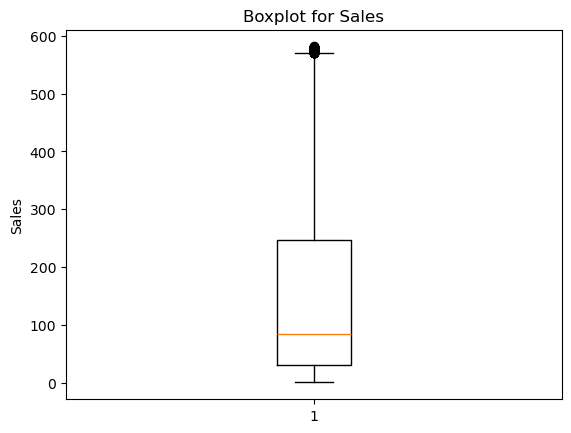

In [42]:
# Boxplot for Sales without outliers

plt.boxplot(new_df['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot for Sales')
plt.show()

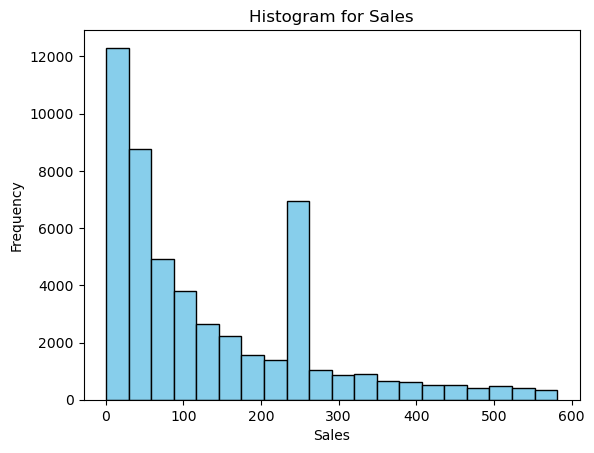

In [43]:
#Histogram for Sales without outliers

plt.hist(new_df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram for Sales')

plt.show()

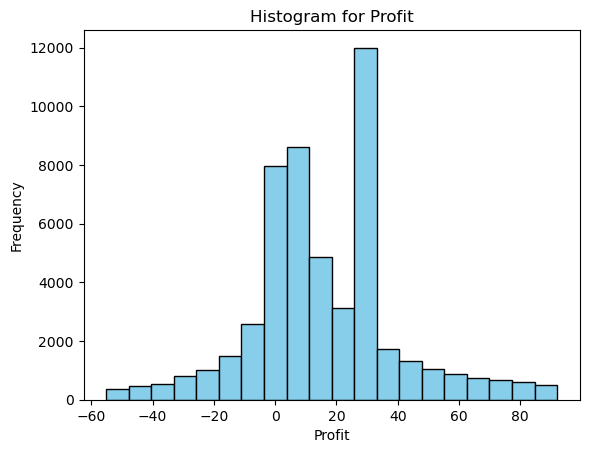

In [44]:
#Histogram for Profit without outliers

plt.hist(new_df['Profit'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram for Profit')

plt.show()

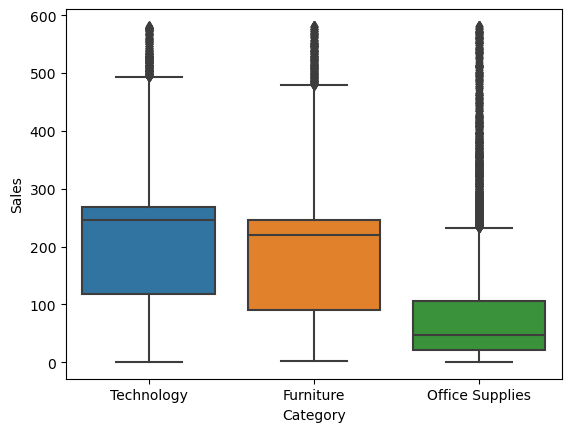

In [45]:
sns.boxplot(x='Category', y='Sales', data=new_df)
plt.show()

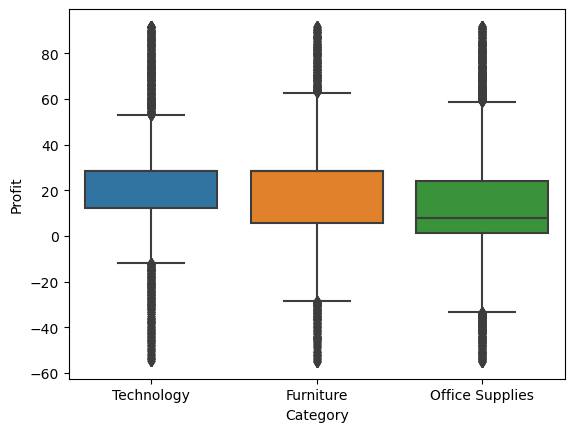

In [46]:
sns.boxplot(x='Category', y='Profit', data=new_df)
plt.show()

In [47]:
# Create a subset with numeric variables

numeric_df= new_df.select_dtypes(include=['number'])
print(numeric_df)

       Row ID   Postal Code       Sales  Quantity  Discount     Profit  \
0       32298  10753.194697  246.490581       7.0  0.000000  28.610982   
1       26341     -1.000000  246.490581       9.0  0.100000  28.610982   
2       25330     -1.000000  246.490581       9.0  0.100000  28.610982   
3       13524     -1.000000  246.490581       5.0  0.100000  28.610982   
4       47221     -1.000000  246.490581       8.0  0.000000  28.610982   
...       ...           ...         ...       ...       ...        ...   
51285   29002     -1.000000   65.100000       5.0  0.000000   4.500000   
51286   35398  10753.194697    0.444000       1.0  0.142908  -1.110000   
51287   40470  10753.194697   22.920000       3.0  0.000000  11.230800   
51288    9596     -1.000000   13.440000       2.0  0.000000   2.400000   
51289    6147     -1.000000   61.380000       3.0  0.000000   1.800000   

       Shipping Cost  
0          26.375915  
1          26.375915  
2          26.375915  
3          26.37591

In [48]:
#Correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.353787 -0.100324 -0.198725 -0.122522 -0.035373   
Postal Code    0.353787     1.000000 -0.072422  0.077772  0.019722 -0.011370   
Sales         -0.100324    -0.072422  1.000000  0.290826 -0.036446  0.466698   
Quantity      -0.198725     0.077772  0.290826  1.000000  0.052696  0.189321   
Discount      -0.122522     0.019722 -0.036446  0.052696  1.000000 -0.348197   
Profit        -0.035373    -0.011370  0.466698  0.189321 -0.348197  1.000000   
Shipping Cost -0.094690    -0.069358  0.787346  0.282274 -0.038382  0.431919   

               Shipping Cost  
Row ID             -0.094690  
Postal Code        -0.069358  
Sales               0.787346  
Quantity            0.282274  
Discount           -0.038382  
Profit              0.431919  
Shipping Cost       1.000000  


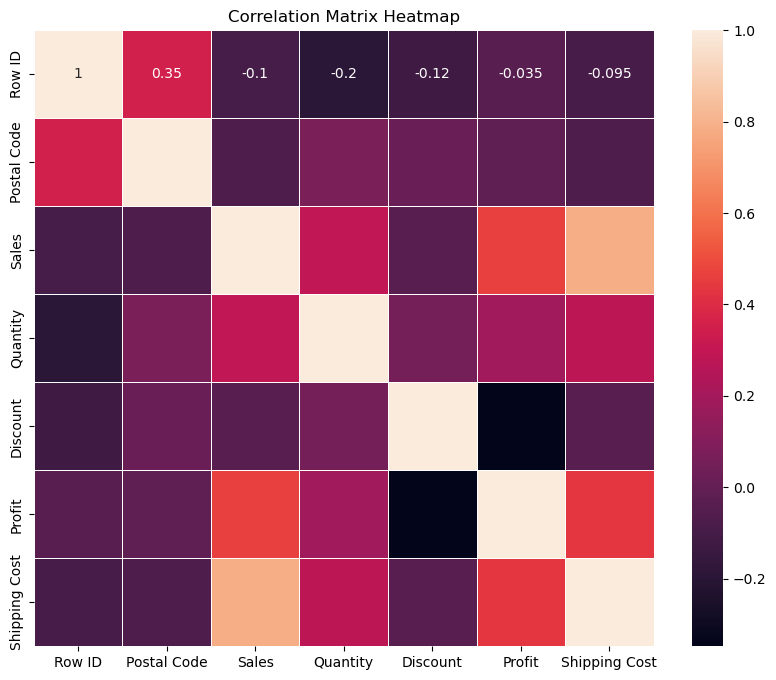

In [49]:
#Correlation with heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anacondanew\envs\Masterthesis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

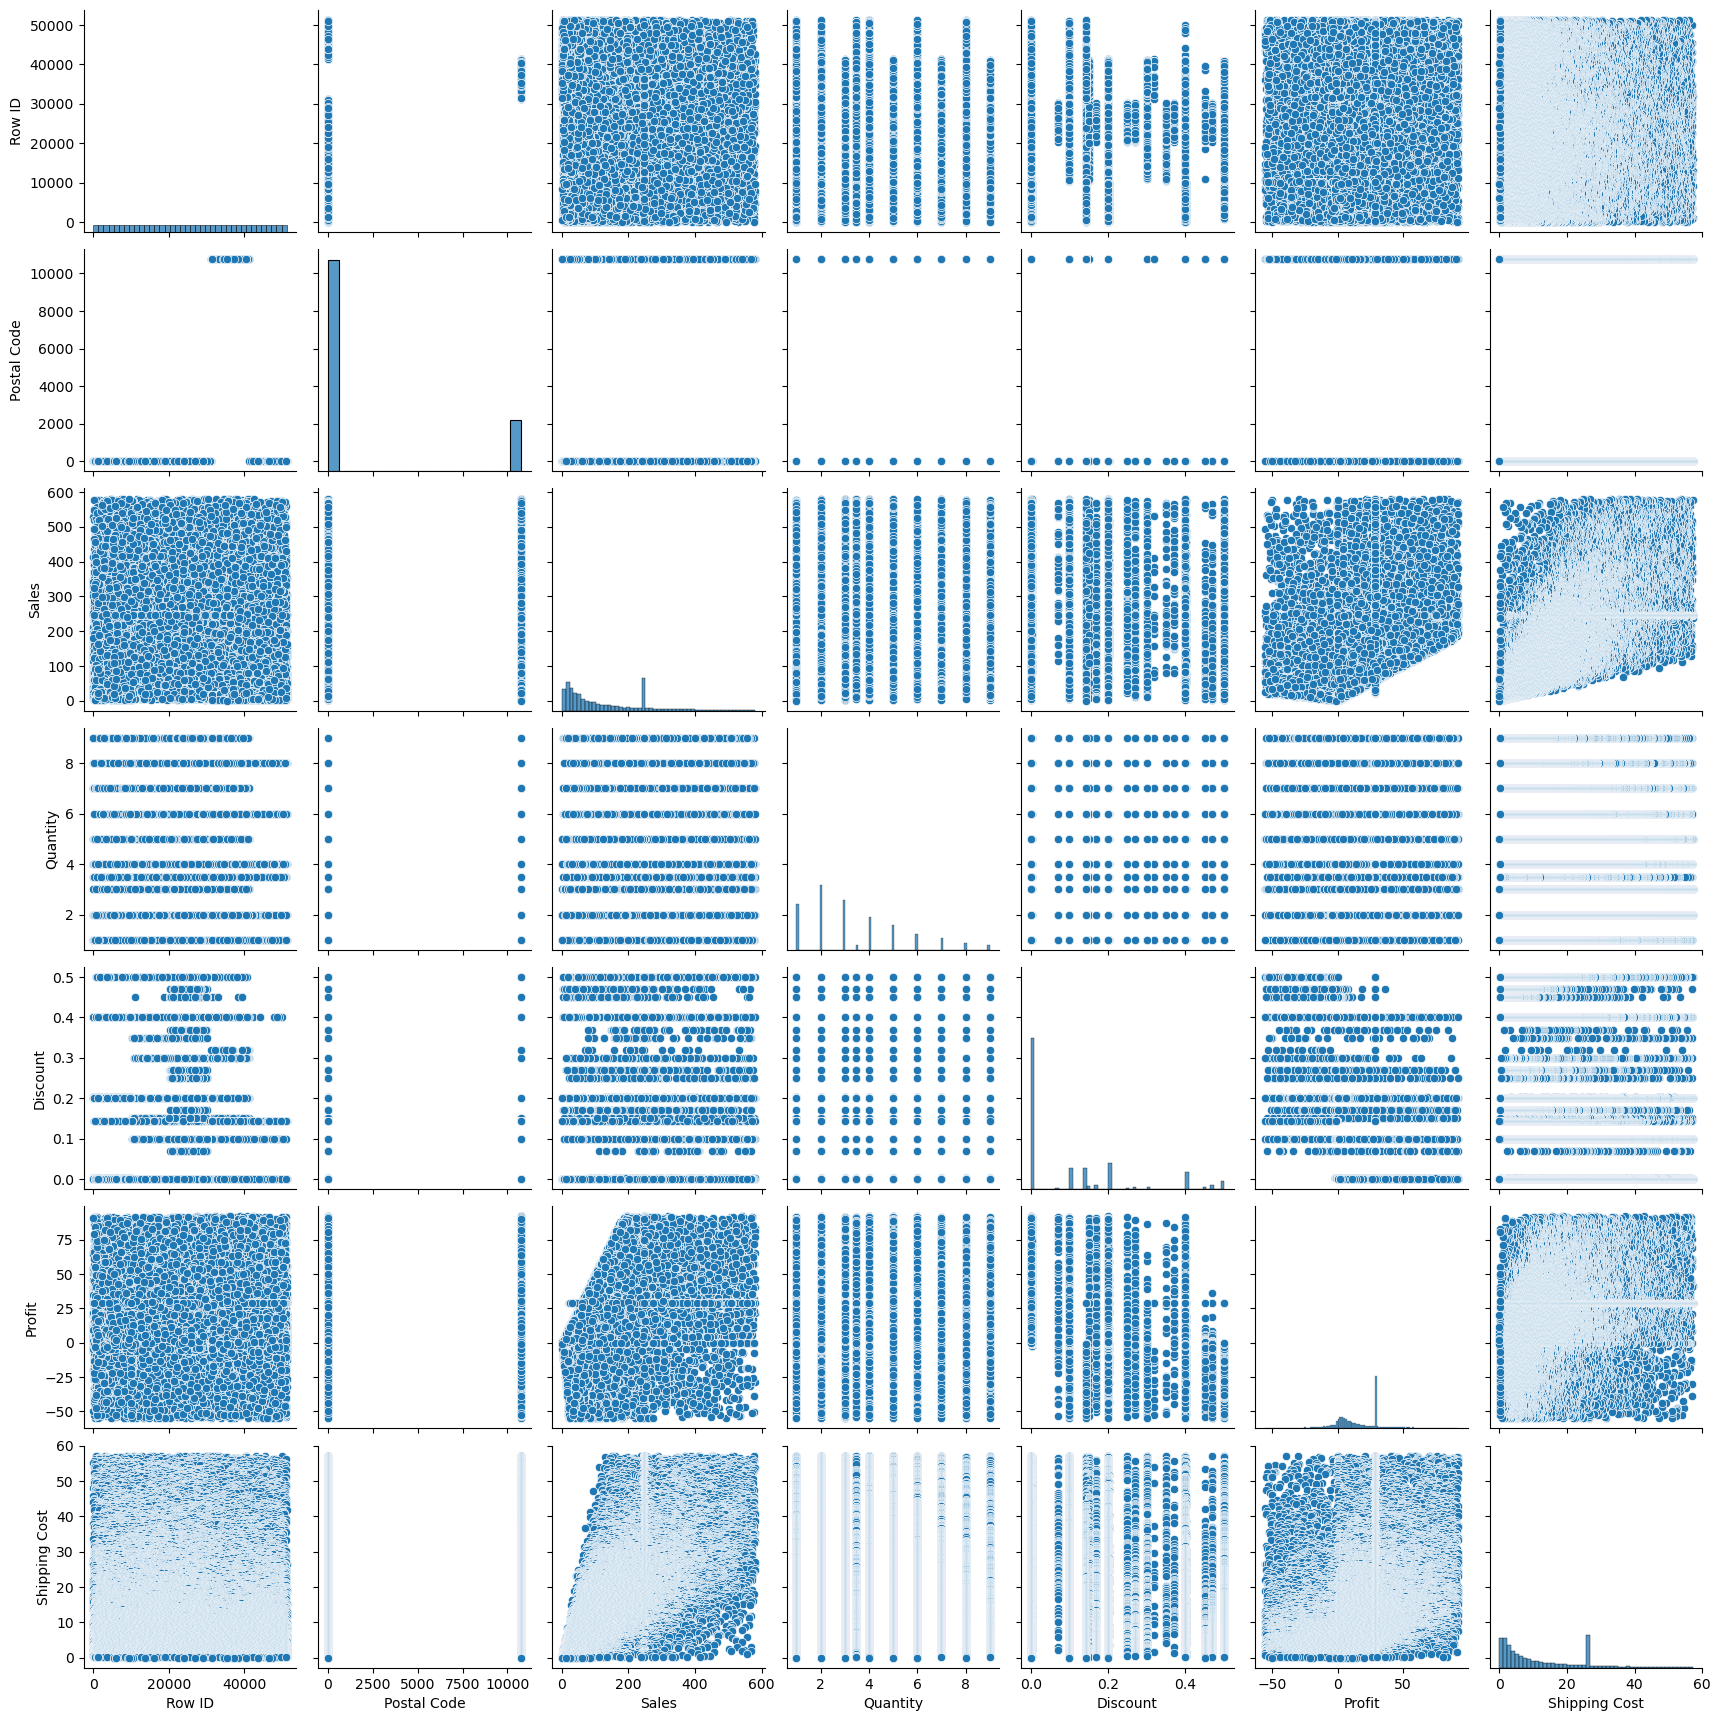

In [50]:
# Create a scatterplot matrix

sns.pairplot(numeric_df)
plt.show()

In [51]:
from scipy.stats import chi2_contingency 

# Function for Chi square test for categorical variables with a=0.05


def is_correlated (x,y):
   data =pd.crosstab (new_df[x],new_df[y])
   chi2_result = chi2_contingency(data,)
   p, x= chi2_result[1], "Correlated" if chi2_result[1] < 0.05 else "Not-Correlated"
   return p,x

In [52]:
is_correlated ('Category', 'Country')

(2.4763382236218627e-56, 'Correlated')

In [54]:
is_correlated ('Category', 'Sub-Category')

(0.0, 'Correlated')

In [55]:
is_correlated ('Category', 'City')

(1.4673081438085744e-07, 'Correlated')

In [56]:
is_correlated ('Sub-Category', 'Ship Mode')

(0.050352441794451384, 'Not-Correlated')

In [63]:
is_correlated ('Category', 'Ship Mode')

(0.8573739834400929, 'Not-Correlated')

In [64]:
is_correlated ('Category', 'Order Priority')

(0.34193459764520795, 'Not-Correlated')

In [65]:
is_correlated ('Category', 'Segment')

(0.6051011989659332, 'Not-Correlated')

In [58]:
is_correlated ('Category', 'gender')

(0.33595859770359143, 'Not-Correlated')

In [59]:
is_correlated ('gender', 'Country')

(2.7777732455720444e-62, 'Correlated')

In [60]:
is_correlated ('Category', 'Region')

(4.2788151792510144e-58, 'Correlated')

In [ ]:
# Encode the categorical variables

In [61]:
# Ordinal encoding for (order priority) variable

from sklearn.preprocessing import OrdinalEncoder

order_of_categories = [['Low', 'Medium', 'High','Critical']]

# Create an instance of OrdinalEncoder with specified categories
ordinal_encoder = OrdinalEncoder(categories=order_of_categories)

# Fit and transform the 'Order Priority' column

new_df['Order_Priority_Encoded'] = ordinal_encoder.fit_transform(new_df[['Order Priority']]) + 1

print(new_df['Order_Priority_Encoded'])

0        4.0
1        4.0
2        2.0
3        2.0
4        4.0
        ... 
51285    2.0
51286    2.0
51287    3.0
51288    2.0
51289    3.0
Name: Order_Priority_Encoded, Length: 51290, dtype: float64


In [66]:
# One-hot encoding

encoded_data= pd.get_dummies(new_df, columns=['Ship Mode', 'Segment', 'Category','Sub-Category','Region','gender','Country'], dtype=int)

In [67]:
print(encoded_data)

       Row ID         Order ID  Order Date   Ship Date Customer ID  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012    RH-19495   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    JR-16210   
2       25330    IN-2013-71249  17-10-2013  18-10-2013    CR-12730   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013    KM-16375   
4       47221     SG-2013-4320  05-11-2013  06-11-2013     RH-9495   
...       ...              ...         ...         ...         ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014    KE-16420   
51286   35398   US-2014-102288  20-06-2014  24-06-2014    ZC-21910   
51287   40470   US-2013-155768  02-12-2013  02-12-2013    LB-16795   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012    RB-19795   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    MC-18100   

          Customer Name           City            State   Postal Code  Market  \
0           Rick Hansen  New York City         New York  10753.194697      US 

In [68]:
encoded_data.drop(columns=['Row ID','Order ID','Ship Date','Postal Code','Product ID','Product Name','Order Priority','Customer Name','Customer ID','Order Date','Sales','Quantity','Discount','Profit','Shipping Cost','State','Market','City'], inplace=True)

In [69]:
print(encoded_data)

       Order_Priority_Encoded  Ship Mode_First Class  Ship Mode_Same Day  \
0                         4.0                      0                   1   
1                         4.0                      0                   0   
2                         2.0                      1                   0   
3                         2.0                      1                   0   
4                         4.0                      0                   1   
...                       ...                    ...                 ...   
51285                     2.0                      0                   1   
51286                     2.0                      0                   0   
51287                     3.0                      0                   1   
51288                     2.0                      0                   0   
51289                     3.0                      0                   0   

       Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Consumer  \
0         

In [70]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [71]:
#Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

In [48]:
print(scaled_data)

[[ 2.27519087 -0.41401175  4.24137516 ... -0.65243595  0.79057192
  -0.3068224 ]
 [ 2.27519087 -0.41401175 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]
 [-0.58360308  2.41539036 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]
 ...
 [ 0.84579389 -0.41401175  4.24137516 ...  1.5327175  -1.26490706
  -0.3068224 ]
 [-0.58360308 -0.41401175 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]
 [ 0.84579389 -0.41401175 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]]


In [72]:
# Perform PCA on the scaled data

pca = PCA(n_components=3)  # Set the number of components as desired
pca_result = pca.fit_transform(scaled_data)

In [57]:
print(pca_result)

[[ 2.02128212 -2.47783929  2.66847566 ... -0.62629569  0.41849022
  -0.44903252]
 [ 2.16591135  2.30165639  2.7715483  ...  0.05434456 -0.18762711
  -1.51370737]
 [ 2.14464928 -2.53878995  1.41430225 ...  0.9736085  -0.70182902
   1.60738341]
 ...
 [-1.34220319  0.10738148  1.2898997  ... -1.95523047  0.9186254
   0.70957436]
 [-1.27260441  0.12212601 -1.1042012  ...  0.60505467 -1.35559909
   0.013715  ]
 [-1.30511497 -0.02519456  2.05129391 ...  1.63654054 -0.83448193
  -0.48333123]]


In [73]:
# Create a DataFrame for the PCA result

pca_df = pd.DataFrame(data=pca_result, columns=['PC1','PC2','PC3'])
print(pca_df)

            PC1       PC2       PC3
0      2.037811  1.578468 -2.195944
1      2.623826 -1.168422  2.619002
2      2.413999  2.870953  0.423246
3      1.724745  1.879589 -2.854899
4      1.545009  4.113945  0.508874
...         ...       ...       ...
51285 -0.963738 -0.063873  1.482801
51286 -1.320164 -1.046926 -2.137120
51287 -1.219700 -0.979981 -1.209358
51288 -1.218001 -0.716998 -0.298678
51289 -1.308563 -0.389597 -1.562775

[51290 rows x 3 columns]


In [74]:
# Elbow method for optimal number of clusters

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# Create a list to store the inertia values for different numbers of clusters
inertia = []

In [76]:
# Range of clusters to test
k_values = range(1, 10)

In [77]:
# Perform KMeans clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    

c:\anacondanew\envs\Masterthesis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\anacondanew\envs\Masterthesis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\anacondanew\envs\Masterthesis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\anacondanew\envs\Masterthesis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\anacondanew\envs\Mast

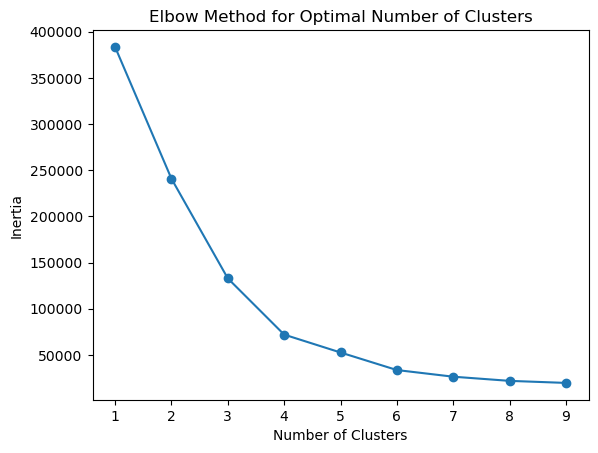

In [78]:
# Plot the inertia values against the number of clusters

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_values)
plt.show()

In [79]:
# inertia (sum distance): confirm visual clue of elbow plot


from kneed import KneeLocator
inertia_knee_c3 = KneeLocator(
        x=range(1,10), 
        y=inertia, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_inertia_c3 = inertia_knee_c3.elbow   
print("elbow at k =", f'{K_inertia_c3:.0f} clusters')

elbow at k = 4 clusters


In [80]:
# Clustering

from sklearn.cluster import KMeans

# Combine PCA result with original data

combined_data = pd.concat([encoded_data, pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3'])], axis=1)

In [81]:
# Apply clustering algorithm k-means

kmeans = KMeans(n_clusters=4) 
clusters = kmeans.fit_predict(combined_data[['PC1', 'PC2','PC3']])

c:\anacondanew\envs\Masterthesis\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
print(clusters)

[2 3 2 ... 0 0 0]


In [83]:
# Evaluate clustering

combined_data['Cluster'] = clusters
print(combined_data.head())

   Order_Priority_Encoded  Ship Mode_First Class  Ship Mode_Same Day  \
0                     4.0                      0                   1   
1                     4.0                      0                   0   
2                     2.0                      1                   0   
3                     2.0                      1                   0   
4                     4.0                      0                   1   

   Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Consumer  \
0                       0                         0                 1   
1                       1                         0                 0   
2                       0                         0                 1   
3                       0                         0                 0   
4                       0                         0                 1   

   Segment_Corporate  Segment_Home Office  Category_Furniture  \
0                  0                    0                   0  

In [84]:
combined_data['Cluster'].value_counts()

Cluster
1    17215
0    14058
2    10141
3     9876
Name: count, dtype: int64

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

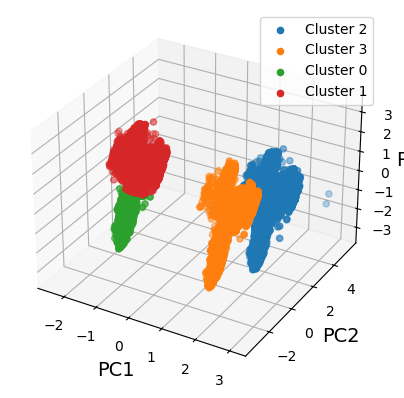

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in combined_data['Cluster'].unique():
    ax.scatter(combined_data.loc[combined_data['Cluster'] == cluster, 'PC1'],
                combined_data.loc[combined_data['Cluster'] == cluster, 'PC2'],
                combined_data.loc[combined_data['Cluster'] == cluster, 'PC3'],
                label=f'Cluster {cluster}')
    
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

ax.legend()
plt.show()
    


In [87]:
combined_data.groupby(['Cluster']).sum()

,Order_Priority_Encoded,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Region_Africa,Region_Canada,Region_Caribbean,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,gender_F,gender_M,gender_Unknown,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Benin,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Cote d'Ivoire,Country_Croatia,Country_Cuba,Country_Czech Republic,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Guadeloupe,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Macedonia,Country_Madagascar,Country_Malaysia,Country_Mali,Country_Martinique,Country_Mauritania,Country_Mexico,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar (Burma),Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,PC1,PC2,PC3
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,33403.0,1979,726,2591,8762,7361,4192,2505,0,14058,0,0,891,2193,3066,0,0,0,891,833,0,1021,0,2096,0,2270,797,0,0,0,0,6936,0,16,1712,0,0,0,3494,3,1897,4392,8383,1283,0,0,0,0,160,1,0,194,0,0,0,0,0,104,0,26,0,740,0,0,0,0,0,0,0,53,0,186,0,0,0,0,0,0,0,0,27,0,420,0,0,0,0,0,1854,0,0,1348,0,0,284,0,0,0,406,0,0,0,0,0,0,0,0,600,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,274,0,358,0,0,0

In [88]:
selected_variables = ['Category_Technology', 'Category_Furniture', 'Category_Office Supplies']

In [89]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Category_Technology,Category_Furniture,Category_Office Supplies
Cluster,,,
0,0,0,14058
1,0,0,17215
2,10141,0,0
3,0,9876,0


In [90]:
selected_variables = ['Sub-Category_Phones', 'Sub-Category_Chairs','Sub-Category_Binders','Sub-Category_Paper','Sub-Category_Storage','Sub-Category_Accessories','Sub-Category_Tables','Sub-Category_Bookcases']

In [91]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Sub-Category_Phones,Sub-Category_Chairs,Sub-Category_Binders,Sub-Category_Paper,Sub-Category_Storage,Sub-Category_Accessories,Sub-Category_Tables,Sub-Category_Bookcases
Cluster,,,,,,,,
0,0,0,3066,2096,2270,0,0,0
1,0,0,3086,1442,2789,0,0,0
2,3357,0,0,0,0,3075,0,0
3,0,3434,0,0,0,0,861,2411


In [92]:
selected_variables = ['Country_United States', 'Country_Australia', 'Country_France','Country_Italy','Country_Germany','Country_Japan','Country_Ireland','Country_Argentina','Country_United Kingdom','Country_Turkey']

In [93]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Country_United States,Country_Australia,Country_France,Country_Italy,Country_Germany,Country_Japan,Country_Ireland,Country_Argentina,Country_United Kingdom,Country_Turkey
Cluster,,,,,,,,,,
0,6026,0,1854,600,1348,0,0,160,0,0
1,0,1608,0,146,0,143,72,60,1091,905
2,1847,633,553,207,399,52,21,79,318,260
3,2121,596,420,155,318,55,13,91,224,213


In [94]:
selected_variables = ['Region_Central','Region_EMEA']

In [95]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Region_Central,Region_EMEA
Cluster,,
0,6936,16
1,0,3281
2,2135,962
3,2046,770


In [96]:
#stats of categorical data by mode

combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['Category_Technology', 'Category_Furniture','Category_Office Supplies']]


,Category_Technology,Category_Furniture,Category_Office Supplies
Cluster,,,
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0


In [97]:
#stats of categorical data by mode

combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['gender_M', 'gender_F','gender_Unknown']]


,gender_M,gender_F,gender_Unknown
Cluster,,,
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0


In [98]:
combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['Order_Priority_Encoded']]

,Order_Priority_Encoded
Cluster,
0,2.0
1,2.0
2,2.0
3,2.0


In [ ]:
# Classification with SVM 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score

In [102]:
X = combined_data[['gender_M','gender_F','gender_Unknown','Segment_Consumer','Segment_Corporate','Segment_Home Office','Ship Mode_First Class','Ship Mode_Second Class','Ship Mode_Same Day','Ship Mode_Standard Class','Category_Technology', 'Category_Furniture', 'Category_Office Supplies', 'Sub-Category_Chairs','Sub-Category_Binders','Sub-Category_Phones','Region_Central','Region_EMEA','Country_United States','Country_Australia']]
Y = combined_data['Cluster']

In [103]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [104]:
#RBF & POLYNOMIAL KERNEL

#POLYNOMIAL 

poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train)

In [105]:
poly_pred = poly.predict(X_test)

In [106]:
poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f1 = f1_score(Y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  95.14
F1 (Polynomial Kernel):  95.06


In [107]:
# RBF

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, Y_train)

In [108]:
rbf_pred = rbf.predict(X_test)

In [109]:

rbf_accuracy = accuracy_score(Y_test, rbf_pred)
rbf_f1 = f1_score(Y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (RBF Kernel):  95.14
F1 (RBF Kernel):  95.06


In [110]:
#Random Forest 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [112]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
 
# Train the classifier
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [113]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [114]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      2760
           1       0.87      1.00      0.93      3475
           2       1.00      1.00      1.00      2063
           3       1.00      1.00      1.00      1960

    accuracy                           0.95     10258
   macro avg       0.97      0.95      0.96     10258
weighted avg       0.96      0.95      0.95     10258



In [115]:
feature_importance_rf = rf_classifier.feature_importances_

In [116]:
feature_names = X.columns

In [117]:
# Sort features by importance

sorted_indices = np.argsort(feature_importance_rf)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importance_rf[sorted_indices]


In [118]:
# Create interactive bar plot

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=sorted_features, y=sorted_importances, marker=dict(color='purple')),
              row=1, col=1)

In [119]:
# Update layout
fig.update_layout(title='Feature Importance',
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  height=600)


fig.show()

In [ ]:
# Product Analysis 

# Create the variables Order_year, Order_month from Order Date

In [120]:
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'])


new_df['Order_year'] = new_df['Order Date'].dt.year
new_df['Order_month'] = new_df['Order Date'].dt.month

In [121]:
print(new_df)

       Row ID         Order ID Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891 2012-07-31  31-07-2012        Same Day   
1       26341    IN-2013-77878 2013-02-05  07-02-2013    Second Class   
2       25330    IN-2013-71249 2013-10-17  18-10-2013     First Class   
3       13524  ES-2013-1579342 2013-01-28  30-01-2013     First Class   
4       47221     SG-2013-4320 2013-11-05  06-11-2013        Same Day   
...       ...              ...        ...         ...             ...   
51285   29002    IN-2014-62366 2014-06-19  19-06-2014        Same Day   
51286   35398   US-2014-102288 2014-06-20  24-06-2014  Standard Class   
51287   40470   US-2013-155768 2013-12-02  02-12-2013        Same Day   
51288    9596   MX-2012-140767 2012-02-18  22-02-2012  Standard Class   
51289    6147   MX-2012-134460 2012-05-22  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New Yo

In [ ]:
# Which country has top sales?

In [122]:
country_group = new_df.groupby('Country')

In [123]:
country_sales = country_group.agg({'Sales':'sum'})
country_sales.sort_values(by='Sales', ascending=False)

,Sales
Country,
United States,1.162030e+06
France,4.699799e+05
Australia,4.529312e+05
Mexico,3.592645e+05
Germany,3.345282e+05
...,...
Tajikistan,2.427840e+02
Macedonia,2.096400e+02
Eritrea,1.877400e+02


In [124]:
# plot of top 5 sales countries

import squarify

In [125]:
top_5_sales = country_sales.nlargest(5, 'Sales')
top_5_sales.index

Index(['United States', 'France', 'Australia', 'Mexico', 'Germany'], dtype='object', name='Country')

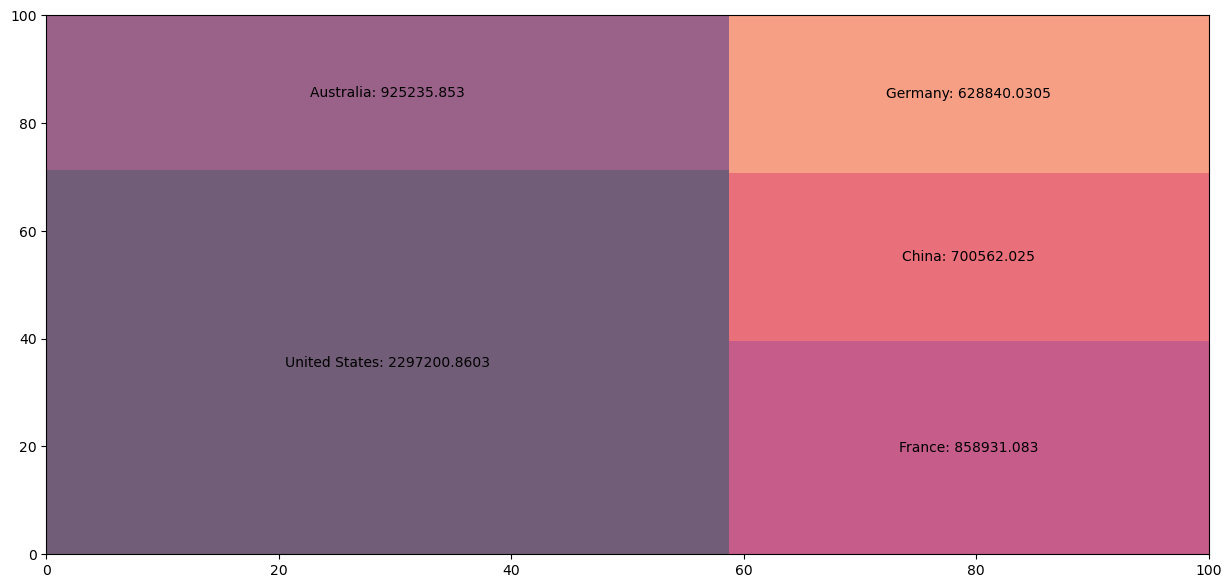

In [126]:
plt.figure(figsize=(15,7))
revs = top_5_sales['Sales'].values
labels = ['United States: 2297200.8603',
         'Australia: 925235.853',
         'France: 858931.083',
         'China: 700562.025',
         'Germany: 628840.0305']
squarify.plot(revs, label=labels,color= sns.color_palette('rocket'), alpha=0.7)
plt.show()

In [127]:
#Lets make the same with percentages


total_sales = top_5_sales['Sales'].sum()

In [128]:
# Calculate the percentages
percentages = [(sales / total_sales) * 100 for sales in top_5_sales['Sales']]


In [129]:
# Create the labels with percentages
labels = [f"{country}: {sales:.2f}%" for country, sales in zip(top_5_sales.index, percentages)]

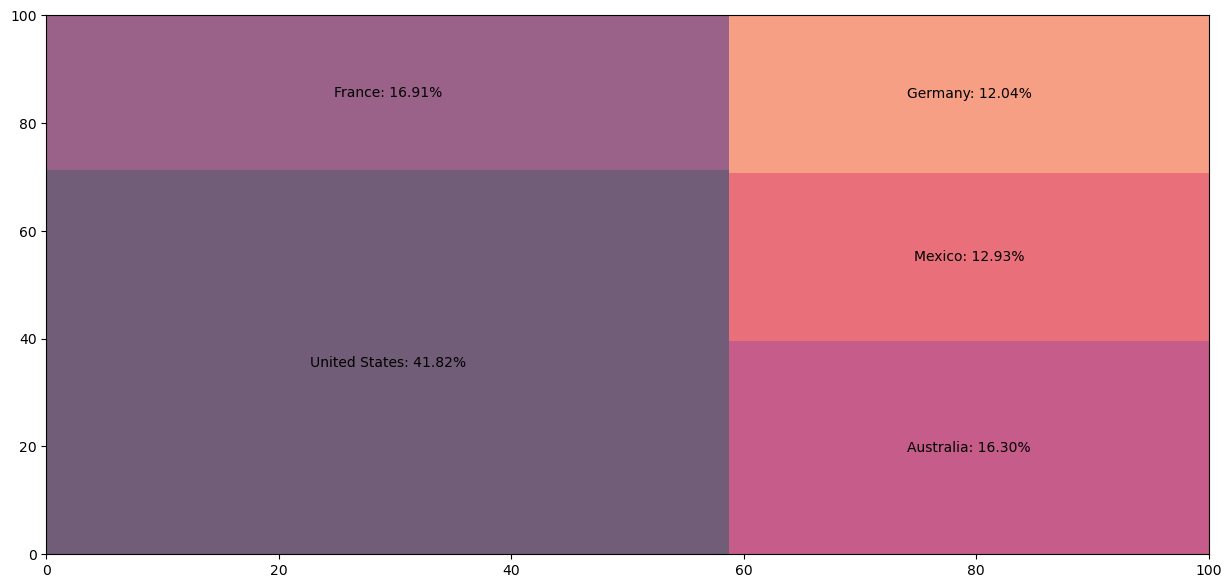

In [130]:
# Create the treemap plot

plt.figure(figsize=(15,7))
squarify.plot(top_5_sales['Sales'].values, label=labels, color=sns.color_palette('rocket'), alpha=0.7)
plt.show()

In [ ]:
# Which are the top 5 profit-making product types on a yearly basis

In [131]:
year_category_group = new_df.groupby(['Order_year','Sub-Category'])

In [133]:
year_category_profit_df = year_category_group.agg({'Profit':'sum'})
year_category_profit_df

Profit
Order_year Sub-Category              
2011       Accessories   10528.617237
           Appliances     7743.281827
           Art           10740.373287
           Binders        8548.900406
           Bookcases     11139.868463
...                               ...
2014       Paper         17562.150306
           Phones        28057.805216
           Storage       28319.382512
           Supplies       9777.110847
           Tables         7283.873955

[68 rows x 1 columns]

In [134]:
year_category_profit_df.reset_index(inplace=True)
category_yearly_profit = year_category_profit_df.groupby('Order_year')
top3_profit_category = pd.DataFrame(columns=year_category_profit_df.columns)

In [135]:
for g, d in category_yearly_profit:
    high_profit_categories = d.nlargest(3, 'Profit')
    top3_profit_category = pd.concat([top3_profit_category,high_profit_categories])

In [136]:
top3_profit_category.style.background_gradient(cmap='rocket', subset=pd.IndexSlice[:, 'Profit'])

,Order_year,Sub-Category,Profit
13,2011,Phones,17266.608205
14,2011,Storage,13640.988551
5,2011,Chairs,13550.939540
30,2012,Phones,18828.575762
31,2012,Storage,16500.856740
22,2012,Chairs,16069.208098
47,2013,Phones,22542.939960
39,2013,Chairs,21395.815658
48,2013,Storage,20128.531609
65,2014,Storage,28319.382512


In [137]:
#Random forest regression

import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [138]:
# One-hot encoding

encoded_data1= pd.get_dummies(new_df, columns=['Category'], dtype=int)

In [140]:
encoded_data1.drop(columns=['Row ID','Order ID','Ship Date','Postal Code','Product ID','Product Name','Order Priority','Customer Name','Customer ID','Order Date','State','Market','City','Ship Mode','Segment','Country'], inplace=True)

In [141]:
print(encoded_data1)

            Sales  Quantity  Discount     Profit  Shipping Cost   gender  \
0      246.490581       7.0  0.000000  28.610982      26.375915        M   
1      246.490581       9.0  0.100000  28.610982      26.375915        M   
2      246.490581       9.0  0.100000  28.610982      26.375915        M   
3      246.490581       5.0  0.100000  28.610982      26.375915        F   
4      246.490581       8.0  0.000000  28.610982      26.375915        M   
...           ...       ...       ...        ...            ...      ...   
51285   65.100000       5.0  0.000000   4.500000       0.010000        F   
51286    0.444000       1.0  0.142908  -1.110000       0.010000  Unknown   
51287   22.920000       3.0  0.000000  11.230800       0.010000        F   
51288   13.440000       2.0  0.000000   2.400000       0.000000        M   
51289   61.380000       3.0  0.000000   1.800000       0.000000        M   

       Order_Priority_Encoded  Order_year  Order_month  Category_Furniture  \
0        

In [177]:
X= encoded_data1[['Profit','Discount','Quantity','Shipping Cost','Category_Technology','Category_Office Supplies','Category_Furniture','Order_year']]
y=encoded_data1['Sales']

In [178]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [179]:
# Train the regressor
rf_regressor.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [180]:
# Evaluate the model (numeric + category + order year)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 4577.43
R-squared Score: 0.73


In [181]:
# Interaction Plot for feature importance 

feature_importance_rf = rf_regressor.feature_importances_

In [182]:
feature_names = X.columns

In [183]:
# Sort features by importance
sorted_indices = np.argsort(feature_importance_rf)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importance_rf[sorted_indices]

In [184]:
# Create interactive bar plot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=sorted_features, y=sorted_importances, marker=dict(color='purple')),
              row=1, col=1)

In [185]:
# Update layout
fig.update_layout(title='Feature Importance',
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  height=600)


fig.show()


In [186]:
# Interaction plot for predicted vs actual values

import plotly.graph_objs as go

In [187]:
# Create a scatter plot
trace = go.Scatter(x=y_test, y=y_pred, mode='markers', marker=dict(color='purple'))


In [188]:
# Add a diagonal line representing perfect predictions
diag_line = go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Perfect Predictions', line=dict(color='blue'))

In [189]:
# Create layout
layout = go.Layout(title='Predicted vs Actual Values',
                   xaxis=dict(title='Actual Values'),
                   yaxis=dict(title='Predicted Values'),
                   showlegend=True)

In [190]:
# Create figure
fig = go.Figure(data=[trace, diag_line], layout=layout)

In [191]:
# Add hover text with additional information
hover_text = [f'Actual: {a}<br>Predicted: {p}' for a, p in zip(y_test, y_pred)]
fig.data[0].update(text=hover_text, hoverinfo='text')

fig.show()

In [192]:
# cross-validation for random forest regression

from sklearn.model_selection import cross_val_score

In [193]:
# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [194]:
# Convert the negative mean squared errors to positive values
cv_scores = -cv_scores


In [195]:

print("Cross-Validation Scores:")
print(cv_scores)


Cross-Validation Scores:
[4349.10275152 4434.61321332 4350.12398933 4490.96207441 4444.75640023]


In [197]:
# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"\nMean Cross-Validation Score: {mean_cv_score:.2f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.2f}")


Mean Cross-Validation Score: 4413.91
Standard Deviation of Cross-Validation Scores: 55.83


In [ ]:
# Now, we will isolate Random  products from  dataset and predict the sales. For this reason, I will create a new subset (newdf2)

In [198]:
# One-hot encoding

newdf2= pd.get_dummies(new_df, columns=['Category'], dtype=int)

In [200]:
newdf2.drop(columns=['Row ID','Order ID','Ship Date','Postal Code','Order Priority','Customer Name','Customer ID','Order Date','State','Market','City','Ship Mode','Segment','Country','Region','gender','Order_Priority_Encoded','Sub-Category','Order_month'], inplace=True)

In [203]:
print(newdf2)

             Product ID                                       Product Name  \
0       TEC-AC-10003033  Plantronics CS510 - Over-the-Head monaural Wir...   
1       FUR-CH-10003950          Novimex Executive Leather Armchair, Black   
2       TEC-PH-10004664                  Nokia Smart Phone, with Caller ID   
3       TEC-PH-10004583                     Motorola Smart Phone, Cordless   
4      TEC-SHA-10000501                     Sharp Wireless Fax, High-Speed   
...                 ...                                                ...   
51285   OFF-FA-10000746                      Advantus Thumb Tacks, 12 Pack   
51286   OFF-AP-10002906  Hoover Replacement Belt for Commercial Guardsm...   
51287   OFF-EN-10001219       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes   
51288   OFF-BI-10000806                            Acco Index Tab, Economy   
51289   OFF-PA-10004155            Eaton Computer Printout Paper, 8.5 x 11   

            Sales  Quantity  Discount     Profit  Shipping Cost

In [204]:
# Isolate 5 Random  products from dataset

random_products = newdf2.sample(n=5)

In [205]:
print(random_products)

             Product ID                                     Product Name  \
3909    FUR-CH-10000399                     Hon Swivel Stool, Set of Two   
8442    OFF-ST-10000025  Fellowes Stor/Drawer Steel Plus Storage Drawers   
47520  OFF-HAR-10001262   Harbour Creations Removable Labels, Adjustable   
41095  FUR-RUB-10001380                Rubbermaid Photo Frame, Erganomic   
44150  OFF-HON-10001723           Hon Color Coded Labels, 5000 Label Set   

            Sales  Quantity  Discount     Profit  Shipping Cost  Order_year  \
3909   246.490581       8.0  0.000000  28.610982      26.375915        2014   
8442   381.720000       5.0  0.200000  28.610982      39.960000        2011   
47520   17.184000       4.0  0.142908  -8.616000       0.810000        2013   
41095   50.370000       1.0  0.000000  15.600000       2.010000        2013   
44150   13.200000       1.0  0.000000   0.000000       1.390000        2014   

       Category_Furniture  Category_Office Supplies  Category_Techno

In [206]:
# Group by Sales

grouped_products = random_products.groupby('Sales').sum()  

In [207]:
print(grouped_products)

                  Product ID                                     Product Name  \
Sales                                                                           
13.200000   OFF-HON-10001723           Hon Color Coded Labels, 5000 Label Set   
17.184000   OFF-HAR-10001262   Harbour Creations Removable Labels, Adjustable   
50.370000   FUR-RUB-10001380                Rubbermaid Photo Frame, Erganomic   
246.490581   FUR-CH-10000399                     Hon Swivel Stool, Set of Two   
381.720000   OFF-ST-10000025  Fellowes Stor/Drawer Steel Plus Storage Drawers   

            Quantity  Discount     Profit  Shipping Cost  Order_year  \
Sales                                                                  
13.200000        1.0  0.000000   0.000000       1.390000        2014   
17.184000        4.0  0.142908  -8.616000       0.810000        2013   
50.370000        1.0  0.000000  15.600000       2.010000        2013   
246.490581       8.0  0.000000  28.610982      26.375915        2014   


In [208]:
# Make predictions

new_product_sales = rf_regressor.predict(grouped_products[['Profit','Discount','Quantity','Shipping Cost','Category_Technology','Category_Office Supplies','Category_Furniture','Order_year']])

In [210]:
# Display the predictions

print("Predicted Sales for New Products:")
print(new_product_sales)

Predicted Sales for New Products:
[ 14.29713     14.21887     49.6149     283.49568047 312.31733479]
